<a href="https://colab.research.google.com/github/hadush16/Dlib-library-Installation/blob/main/Intelligent_Call_Anti_Theft_with_Advanced_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install face_recognition
!pip install opencv-python


In [41]:
!pip install face_recognition

In [42]:
!pip show face_recognition

Name: face-recognition
Version: 1.3.0
Summary: Recognize faces from Python or from the command line
Home-page: https://github.com/ageitgey/face_recognition
Author: Adam Geitgey
Author-email: ageitgey@gmail.com
License: MIT license
Location: /usr/local/lib/python3.11/dist-packages
Requires: Click, dlib, face-recognition-models, numpy, Pillow
Required-by: 


In [43]:
!pip install -U tensorflow

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (112, 112)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 67 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [45]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze backbone for faster training

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)  # 3 classes for 3 persons

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


<ipython-input-45-91ab5b245b6f>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(112, 112, 3), include_top=False, weights='imagenet')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 56, 56,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 56, 56,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 56, 56,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 56, 56,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 56, 56,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 56, 56,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 56, 56,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 56, 56,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 57, 57,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 28, 28,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 28, 28,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 28, 28,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 28, 28,    │      2,304 │ block_1_depthwis

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [48]:
EPOCHS = 100

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 1.0000 - loss: 0.0257 - val_accuracy: 0.7333 - val_loss: 1.6104
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.6667 - val_loss: 1.1620
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.7333 - val_loss: 1.4849
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9918 - loss: 0.0496 - val_accuracy: 0.7333 - val_loss: 1.1237
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9837 - loss: 0.0307 - val_accuracy: 0.6667 - val_loss: 1.1452
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9498 - loss: 0.0888 - val_accuracy: 0.7333 - val_loss: 1.4267
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9727 - loss: 0.0463 - val_accuracy: 0.6667 - val_loss: 1.4163
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 0.7333 - val_loss: 0.8282


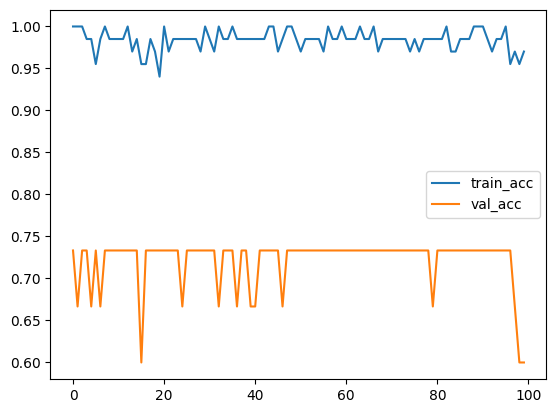

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


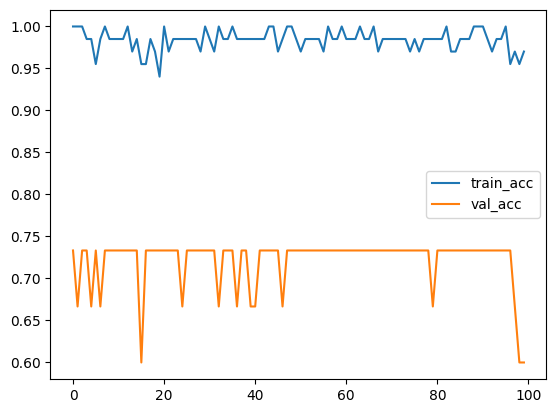

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = pred[0][class_idx]

    print(f"Predicted: Person {class_idx + 1} with {confidence:.2f} confidence")

predict_image("/content/drive/MyDrive/Pictures/ahadu.PNG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Person 2 with 0.94 confidence


In [51]:
model.save("face_recognition_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("face_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp_aordix_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name='keras_tensor_471')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137975628851024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137974698149840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137974698151568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137974698151376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137974698150800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137974698150224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137975494098384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137975494094736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137975494098192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137975494094928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1379754940